## Cleaning and EDA

***IMPORTS***

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer


pd.options.display.max_colwidth = 400

## Load Data

In [6]:
date = pd.read_csv('./data_collection_days/date_combined.csv')
food = pd.read_csv('./data_collection_days/food_combined.csv')

***Lowercase the Columns***

In [7]:
date.columns = date.columns.str.lower()
food.columns = food.columns.str.lower()

***Check for null values***

In [8]:
date.isnull().sum()

title_and_selftext    0
author                0
score                 0
url                   0
created               0
upvote_ratio          0
dtype: int64

In [9]:
food.isnull().sum()

title_and_selftext    0
author                0
score                 0
url                   0
created               0
upvote_ratio          0
dtype: int64

***Drop URL Column***

In [10]:
date.drop('url', axis = 1, inplace = True)

In [11]:
food.drop('url', axis = 1, inplace = True)

## Duplicates

***Cleaning Duplicates in the Date Dataset***

In [12]:
date.shape

(3967, 5)

In [13]:
date = date.drop_duplicates()

In [14]:
#First drop dupes didn't get rid of all the dupes in self_text.
date = date.drop_duplicates(subset = ['title_and_selftext'])

In [15]:
date.shape

(1765, 5)

***Cleaning Duplicates in the Food Dataset***

In [16]:
food.shape

(4838, 5)

In [17]:
food = food.drop_duplicates()

In [18]:
food = food.drop_duplicates(subset = ['title_and_selftext'])

In [19]:
food.shape

(1056, 5)

***Duplicate posts removed but did not remove the moderator posts. Removing mod posts***

In [20]:
author_kill = 'SyCams'

date.drop(date[date['author'] == author_kill].index, inplace = True)

***Created a Column to Show Length of Posts***

In [21]:
date['status_length'] = date['title_and_selftext'].apply(lambda x: len(x))

In [22]:
food['status_length'] = food['title_and_selftext'].apply(lambda x: len(x))

In [23]:
# Made a column with status length of the posts.

***Created a Column to Show the Word Count of Posts***

In [24]:
date['status_word_count'] = date['title_and_selftext'].apply(lambda x: len(x.split()))

In [25]:
food['status_word_count'] = food['title_and_selftext'].apply(lambda x: len(x.split()))

In [26]:
#Made a column with word count in posts.

***Created a Column to Show the Character Count of Posts***

In [27]:
date['status_char_count'] = date['title_and_selftext'].apply(lambda x: len(x))

In [28]:
food['status_char_count'] = food['title_and_selftext'].apply(lambda x: len(x))

***Title_and_selftext top 5 and worst scores***

***Date***

In [29]:
date = date.sort_values(by = "score")
worst_date = date.head()
best_date = date.tail()

print("Five worst date scores:")
print(worst_date)

print("\nFive best date scores:")
print(best_date)

Five worst date scores:
                                                                                                                                                                                                                                                                                                                                                                                                   title_and_selftext  \
3560  Disclose racial preferences up front Ever  realize someone didn’t  want a  serious relationship with you because you’re not white? They see you as fine to date, but they never saw you as someone they would enter into a serious relationship with and eventually marry. To those that say stick to your own race, then you could avoid this feeling but not everyone uses racial preference  as the only ...   
881   My pal is going to mess everything up 🤦‍♂️ So I met this girl on holiday(Zambia), on my second day. Man 😍 as close to love at first sight as I’m sure I’

***Food***

In [30]:
food = food.sort_values(by = "score")
worst_food = food.head()
best_food = food.tail()

print("Five worst date scores:")
print(worst_food)

print("\nFive best date scores:")
print(best_food)

Five worst date scores:
                                                                                                                                                                                                                                                                                                                                                                                                   title_and_selftext  \
3901  How much sodium from a cooking liquid makes it into the food? I've been trying to recently modify some of my recipes to reduce sodium amounts for health reasons.  One of the recipes I have is a dish that involves chicken cooking in primarily chicken broth with assorted spices, then shredded before being served.\n\nI am happy to use low sodium chicken broth, though even low sodium broth still h...   
148   Boil the milk before making a crème anglaise for an ice cream? Lauroose vs The Perfect Scoop I've been researching ice cream recipes, but I received two

***Inference from the posts***

***Date***
+ Longer length posts tend to score higher in the date dataset. 
+ Top tier posts range from 200 - 700 words. 
+ Poorly rated posts go from 0 - 300 words.
+ Content is mainly focused on race or bitterness of being not sought after.

***Food***
+ Word count and status length are shorter than date dataset for high rated posts.
+ Majority tend to be around 200 words and talking about how recipes were a part of there soul.
+ The worst rated posts were about even in length and word counts. This is not surprising since food is a direct subject.
+ Focus on directions with questions sprinkled in.

In [31]:
date.to_csv('date_use.csv', index = False)

In [32]:
food.to_csv('food_use.csv', index = False)

## Graph Exploration

## Date

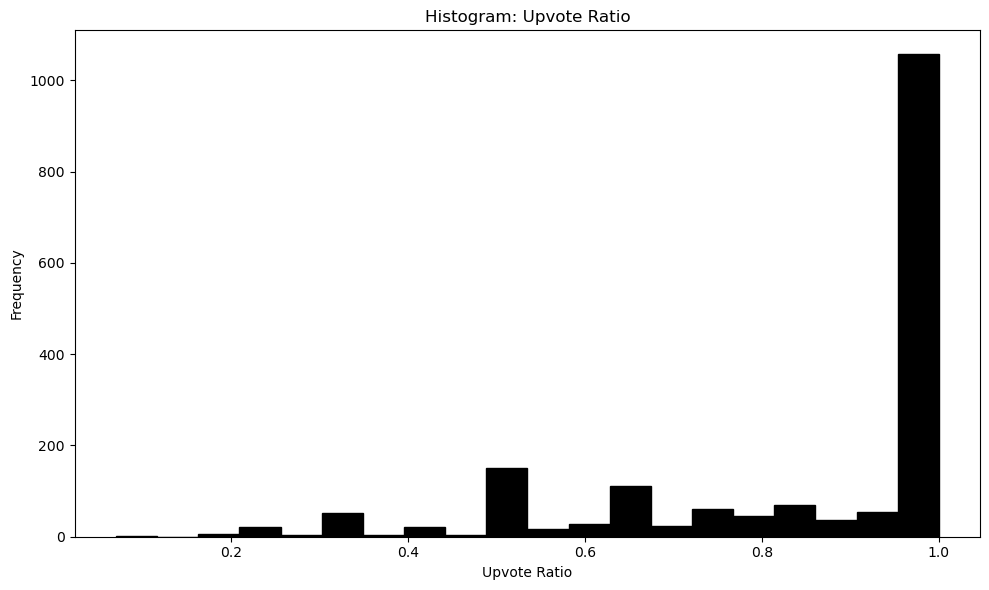

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(date['upvote_ratio'], bins=20, color='black', edgecolor='black')
plt.xlabel('Upvote Ratio')
plt.ylabel('Frequency')
plt.title('Histogram: Upvote Ratio')
plt.tight_layout()
plt.show()

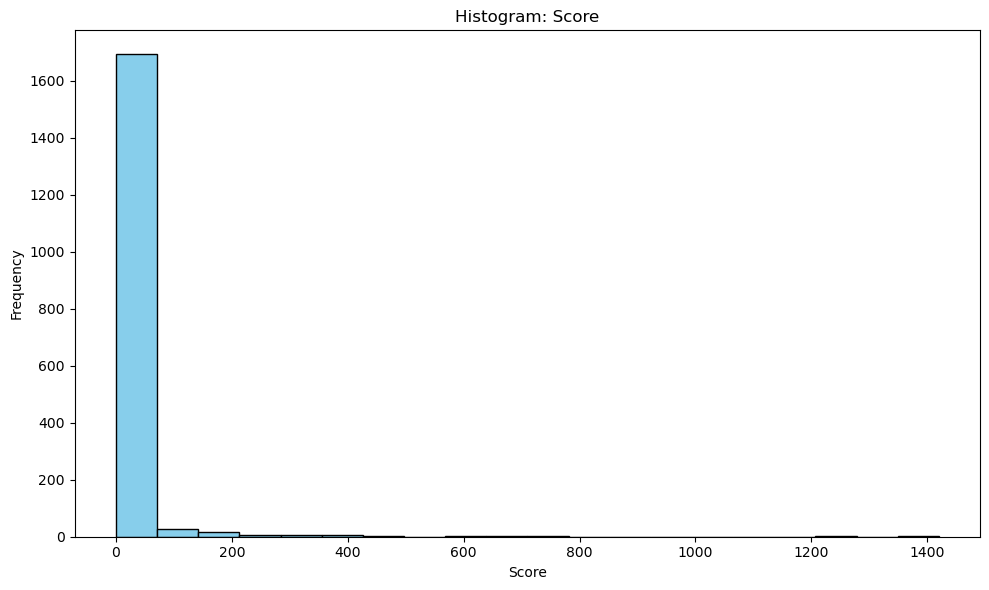

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(date['score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram: Score')
plt.tight_layout()
plt.show()

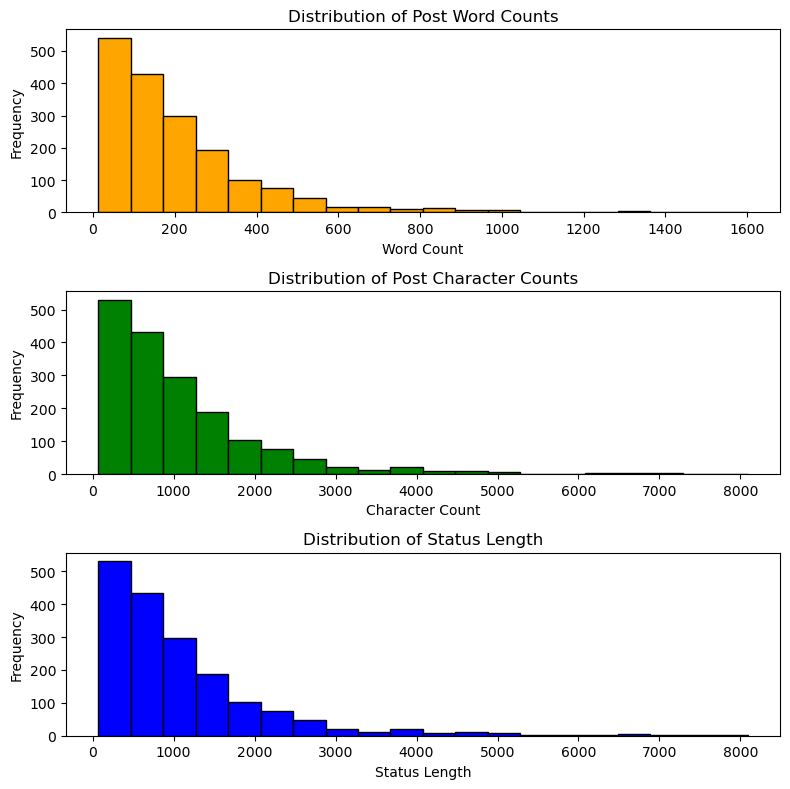

<Figure size 640x480 with 0 Axes>

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))

ax1.hist(date['status_word_count'], bins=20, color='orange', edgecolor='black')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Post Word Counts')

ax2.hist(date['status_char_count'], bins=20, color='green', edgecolor='black')
ax2.set_xlabel('Character Count')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Post Character Counts')

ax3.hist(date['status_length'], bins=20, color='blue', edgecolor='black')
ax3.set_xlabel('Status Length')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Status Length')


plt.tight_layout()
plt.show()

plt.savefig('./images/date_subplot.png', bbox_inches = 'tight')

***Date Graph Evaluations***
+ Both upvote and score graphs are very all or nothing distributions which do not tell us much about the overall workings of the dataset. This does make sense though since like most things on the internet virality isn't equally distributed. Will not use those for the food graph below.
+ For length, character counts, and word counts we see a expected trend to where we start to drop off in post length over 200 words. The words seem to be shorter since the character lengths were following the trends that the word count set. Status length accompanying the other two graphs to secure the trend on how the posts were averaged. 

## Food Graphs

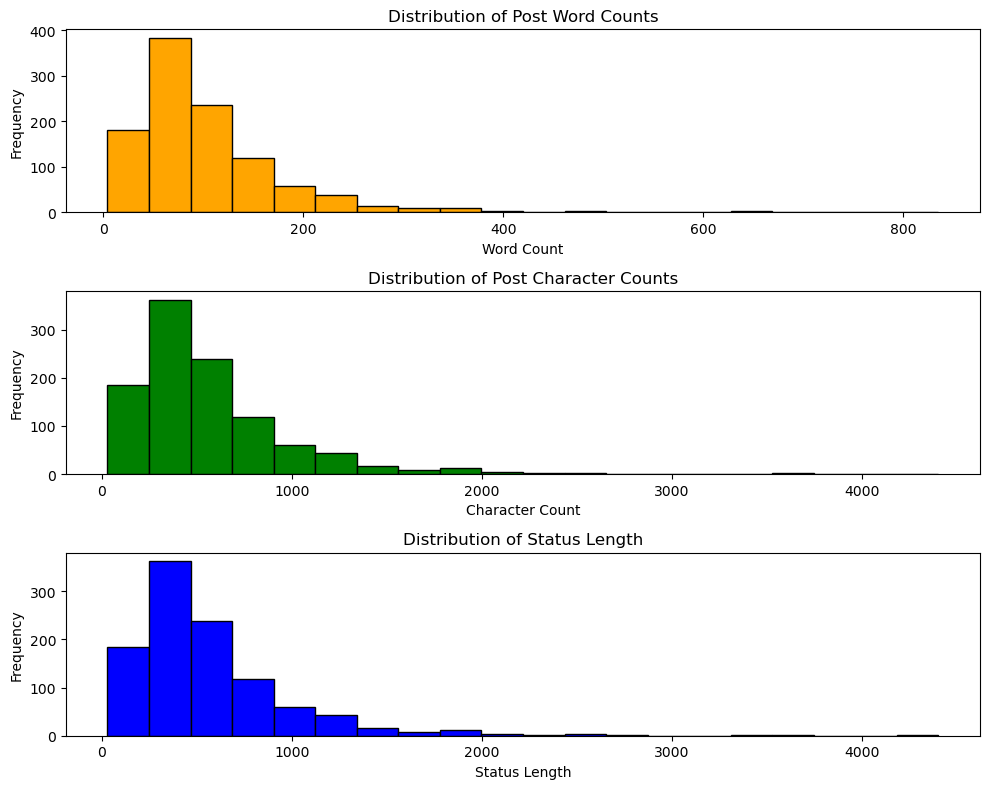

<Figure size 640x480 with 0 Axes>

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

ax1.hist(food['status_word_count'], bins=20, color='orange', edgecolor='black')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Post Word Counts')

ax2.hist(food['status_char_count'], bins=20, color='green', edgecolor='black')
ax2.set_xlabel('Character Count')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Post Character Counts')

ax3.hist(food['status_length'], bins=20, color='blue', edgecolor='black')
ax3.set_xlabel('Status Length')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Status Length')


plt.tight_layout()
plt.show()

plt.savefig('./images/food_subplot.png', bbox_inches = 'tight')

***Food Graph Evaluations***
+ Quite a contrast as compared to the date graphs. It appears the posts are generally 200 words and below. 
+ The character count and status length are longer though showing that the words used in the posts are longer than the ones used in the date dataset.
+ This could be due to the use of cooking metrics like, temperature, water, and boiling. 

## EDA on Word Counts

***Date Words***

In [38]:
#Bigrams

cvec = CountVectorizer(stop_words = 'english')

cvec.fit(date['title_and_selftext'])

nstat = cvec.transform(date['title_and_selftext'])

In [39]:
nstat

<1764x10794 sparse matrix of type '<class 'numpy.int64'>'
	with 110135 stored elements in Compressed Sparse Row format>

In [40]:
statdf = pd.DataFrame(nstat.todense(),
                     columns = cvec.get_feature_names_out())

In [41]:
word_counts = statdf.sum()

top_fifteen = word_counts.sort_values(ascending = False).head(15)

print(top_fifteen)

just            2514
like            2482
don             1519
know            1368
want            1322
time            1300
ve              1289
really          1281
dating          1227
feel            1120
date            1084
said             944
relationship     905
think            880
people           764
dtype: int64


***Evaluations***

+ The majority of the words are focused on asking for advice. 
+ We see some key words like relationship, dating, date, and people.
+ Checking out Lemmatization or Stemming may prove useful later on.

***Food Words***

In [42]:
cvec = CountVectorizer(stop_words = 'english')

cvec.fit(food['title_and_selftext'])

fstat = cvec.transform(food['title_and_selftext'])

In [43]:
fstat

<1056x7844 sparse matrix of type '<class 'numpy.int64'>'
	with 40982 stored elements in Compressed Sparse Row format>

In [44]:
statdf = pd.DataFrame(fstat.todense(),
                     columns = cvec.get_feature_names_out())

In [45]:
word_counts = statdf.sum()

top_fifteen = word_counts.sort_values(ascending = False).head(15)

print(top_fifteen)

like       501
make       494
just       473
recipe     380
ve         372
use        353
chicken    293
time       289
water      269
making     264
sauce      262
don        246
know       244
cook       240
https      230
dtype: int64


***Evaluations***
+ Just like the date dataset people are still asking for advice so a lot of the same words are seen here.
+ Key words are chicken, water, sauce, cook, recipe, and https.
+ Looks like we will have to remove the URL links in the posts down the line.